# Ontology Loading

In [13]:
# !pip install Owlready2
from owlready2 import get_ontology

toyota_onto = get_ontology("TTICarOnto.owl").load()
new_toyota_onto = get_ontology("toyotaontology_new.owl").load()

# KITTI Dataset

In [4]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("nateraw/kitti")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/7481 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7518 [00:00<?, ? examples/s]

In [5]:
df_train = pd.DataFrame(dataset['train'])

In [6]:
df_train.head()

,image,label
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': 2.05, 'bbox': [0.0, 201.91, 381.56,..."
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': 2.42, 'bbox': [0.0, 148.04, 251.73,..."
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': -1.58, 'bbox': [670.17, 173.58, 690..."
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': -2.98, 'bbox': [438.55, 135.26, 526..."
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': -1.64, 'bbox': [707.32, 168.89, 730..."


In [ ]:
df_prova_train = df_train.copy()

In [14]:
onto_class_list = []

for index, row in df_prova_train.iterrows():
    onto_class = []
    for c in row['Classes']:
        if len(toyota_onto.search(iri = "*#"+c))>0:
            onto_class.append(toyota_onto.search(iri = "*#"+c))
#     row["OntologyClasses"] = onto_class
    onto_class_list.append(onto_class)
df_prova_train["OntologyClasses"] = onto_class_list
df_prova_train

,image,label,Classes,OntologyClasses
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': 2.05, 'bbox': [0.0, 201.91, 381.56,...","[Car, Car, Van, Car]","[[sensor.Car], [sensor.Car], [sensor.Van], [se..."
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': 2.42, 'bbox': [0.0, 148.04, 251.73,...","[Van, Car, Car, Car, Car, DontCare, DontCare, ...","[[sensor.Van], [sensor.Car], [sensor.Car], [se..."
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': -1.58, 'bbox': [670.17, 173.58, 690...","[Pedestrian, Pedestrian, Pedestrian, DontCare,...","[[sensor.Pedestrian], [sensor.Pedestrian], [se..."
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': -2.98, 'bbox': [438.55, 135.26, 526...",[Pedestrian],[[sensor.Pedestrian]]
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': -1.64, 'bbox': [707.32, 168.89, 730...","[Car, Truck, DontCare, DontCare]","[[sensor.Car], [sensor.Truck]]"
...,...,...,...,...
7476,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': 1.87, 'bbox': [302.0, 195.57, 467.0...","[Car, Car, Van, Car]","[[sensor.Car], [sensor.Car], [sensor.Van], [se..."
7477,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': -2.41, 'bbox': [922.85, 185.38, 124...","[Car, Car, Car, Car, Car, Car, Car, Misc, Dont...","[[sensor.Car], [sensor.Car], [sensor.Car], [se..."
7478,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': -1.0, 'bbox': [785.01, 165.73, 833....","[Car, Car, Car, Car, Car, Car, Car, DontCare]","[[sensor.Car], [sensor.Car], [sensor.Car], [se..."
7479,<PIL.PngImagePlugin.PngImageFile image mode=RG...,"[{'alpha': -1.57, 'bbox': [581.01, 144.24, 637...","[Truck, Car]","[[sensor.Truck], [sensor.Car]]"


In [16]:
df_prova_train.to_csv("KITTI_semantificated.csv")

# CityScapes Dataset

In [28]:
!pip install opendatasets --upgrade --quiet

import pandas as pd
import os
import opendatasets as od

# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/xiaose/cityscapes'
# Using opendatasets let's download the data sets
# od.download(dataset)

# {"username":"AAAAA","key":"******"}

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
from collections import namedtuple
#--------------------------------------------------------------------------------
# Definitions
#--------------------------------------------------------------------------------

# a label and all meta information
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ] )

labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]

#--------------------------------------------------------------------------------
# Create dictionaries for a fast lookup
#--------------------------------------------------------------------------------

# Please refer to the main method below for example usages!

# name to label object
name2label      = { label.name    : label for label in labels           }
# id to label object
id2label        = { label.id      : label for label in labels           }
# trainId to label object
id2category     = { label[4]   : label.category for label in labels  }
trainId2label   = { label.trainId : label for label in reversed(labels) }
# category to list of label objects
category2labels = {}
for label in labels:
    category = label.category
    if category in category2labels:
        category2labels[category].append(label)
    else:
        category2labels[category] = [label]

In [13]:
id2category

{0: 'void',
 1: 'flat',
 2: 'construction',
 3: 'object',
 4: 'nature',
 5: 'sky',
 6: 'human',
 7: 'vehicle'}

In [18]:
LABELS_DICT = {"void"        :["static", "ground", "dynamic"],
               "human"       :["person", "rider"],
               "object"      :["pole", "traffic sign", "traffic light", "pole group"],
               "sky"         :["sky"],
               "vehicle"     :["car", "bicycle", "bus", "truck", "train", "motorcycle", "caravan", "trailer"],
               "nature"      :["vegetation", "terrain"],
               "construction":["building", "fence", "wall", "bridge", "tunnel", "guard rail"],
               "flat"        :["road", "sidewalk", "parking", "rail track"]
              }

In [19]:
FOLDER_TRAINING_IMAGES = "cityscapes/Cityspaces/images/train/"
FOLDER_TRAINING_MASK   = "cityscapes/Cityspaces/gtFine/train/"

FOLDER_VALIDATION_IMAGES = "cityscapes/Cityspaces/images/val/"
FOLDER_VALIDATION_MASK   = "cityscapes/Cityspaces/gtFine/val/"

In [21]:
from IPython.display import clear_output
import pandas as pd
import json
import os

# Define a dataframe with Pandas
cityscapes_df_train = pd.DataFrame()

# Loop over city folder
for city_folder in os.listdir(FOLDER_TRAINING_MASK):
    print("[INFO]: Processing city folder ", city_folder)
    
    city_folder_full = os.path.join(FOLDER_TRAINING_MASK, city_folder)
    
    # Loop in each city folder
    for i, file in enumerate(os.listdir(city_folder_full)):
        
        # Parse only json file
        if file.endswith("json"):
            print("[INFO]: Processing file {} / {}: {}".format(i+1, len(os.listdir(city_folder_full)), file))
            clear_output(wait=True)
            filename = os.path.join(city_folder_full, file)
            
            # In each json file, pop labels            
            with open(filename) as json_file:
                data = json.load(json_file)
                labels = list()
                labels_main = list()
                
                for elt in data["objects"]:
                    for k, v in elt.items():
                        if k == "label":
                            labels.append(v)
                            try:
                                labels_main.append(name2label[v][3])
                            except:
                                pass

                data["filepath"] = file
                data["labels"] = labels
                data["labels_count"] = len(labels)
                
                data["labels_main"] = labels_main
                data["labels_main_count"] = len(labels_main)
                
                data["city"] = city_folder
                del data["objects"]
            
            basename = "_".join(file.split(".")[0].split("_")[:3])
            
            df_tmp = pd.DataFrame.from_dict(data, orient='index', columns=[basename]).T
            cityscapes_df_train = pd.concat([cityscapes_df_train, df_tmp])

cityscapes_df_train

,imgHeight,imgWidth,filepath,labels,labels_count,labels_main,labels_main_count,city
weimar_000054_000019,1024,2048,weimar_000054_000019_gtFine_polygons.json,"[sky, road, static, vegetation, sidewalk, side...",53,"[sky, flat, void, nature, flat, flat, construc...",53,weimar
weimar_000090_000019,1024,2048,weimar_000090_000019_gtFine_polygons.json,"[road, building, sky, sky, vegetation, vegetat...",58,"[flat, construction, sky, sky, nature, nature,...",57,weimar
weimar_000128_000019,1024,2048,weimar_000128_000019_gtFine_polygons.json,"[building, road, sky, building, pole, pole, ve...",76,"[construction, flat, sky, construction, object...",74,weimar
weimar_000003_000019,1024,2048,weimar_000003_000019_gtFine_polygons.json,"[road, sky, sidewalk, sidewalk, sidewalk, buil...",57,"[flat, sky, flat, flat, flat, construction, co...",57,weimar
weimar_000099_000019,1024,2048,weimar_000099_000019_gtFine_polygons.json,"[road, sidewalk, building, traffic sign, perso...",82,"[flat, flat, construction, object, human, huma...",79,weimar
...,...,...,...,...,...,...,...,...
bremen_000315_000019,1024,2048,bremen_000315_000019_gtFine_polygons.json,"[road, sky, sidewalk, sidewalk, building, vege...",40,"[flat, sky, flat, flat, construction, nature, ...",40,bremen
bremen_000089_000019,1024,2048,bremen_000089_000019_gtFine_polygons.json,"[road, sky, vegetation, building, vegetation, ...",80,"[flat, sky, nature, construction, nature, cons...",78,bremen
bremen_000237_000019,1024,2048,bremen_000237_000019_gtFine_polygons.json,"[sky, road, sidewalk, sidewalk, vegetation, bu...",67,"[sky, flat, flat, flat, nature, construction, ...",66,bremen
bremen_000219_000019,1024,2048,bremen_000219_000019_gtFine_polygons.json,"[sky, road, vegetation, building, building, st...",131,"[sky, flat, nature, construction, construction...",127,bremen


In [23]:
cityscapes_onto_classes = []          # contains the toyota ontology classes for each label element
total_only_existing_onto_label = []   # contains the toyota ontology classes for only those that exist
full_label_in_ontology = []           # contains all labels that have at least one match in the toyota ontology

for _,row in cityscapes_df_train.iterrows():
    only_existing_onto_label = []
    list_label_onto = []
    label_in_ontology = []
    for lbl in row.labels:
        onto_label = toyota_onto.search(iri = "*#"+lbl.capitalize())
        if onto_label:
            list_label_onto.append(onto_label)
            only_existing_onto_label.append(onto_label)
            label_in_ontology.append(lbl)
        else:
            list_label_onto.append(None)
    full_label_in_ontology.append(label_in_ontology)
    cityscapes_onto_classes.append(list_label_onto)
    total_only_existing_onto_label.append(only_existing_onto_label)

In [24]:
cityscapes_df_semantificated = cityscapes_df_train.copy()
cityscapes_df_semantificated['OntologyLabel'] = cityscapes_onto_classes
cityscapes_df_semantificated['labels_in_ontology'] = full_label_in_ontology
cityscapes_df_semantificated['ontology_labels_only_existing'] = total_only_existing_onto_label
cityscapes_df_semantificated

,imgHeight,imgWidth,filepath,labels,labels_count,labels_main,labels_main_count,city,OntologyLabel,labels_in_ontology,ontology_labels_only_existing
weimar_000054_000019,1024,2048,weimar_000054_000019_gtFine_polygons.json,"[sky, road, static, vegetation, sidewalk, side...",53,"[sky, flat, void, nature, flat, flat, construc...",53,weimar,"[None, None, None, None, None, None, None, Non...","[car, car, person, person, person, car, car, c...","[[sensor.Car], [sensor.Car], [sensor.Person, w..."
weimar_000090_000019,1024,2048,weimar_000090_000019_gtFine_polygons.json,"[road, building, sky, sky, vegetation, vegetat...",58,"[flat, construction, sky, sky, nature, nature,...",57,weimar,"[None, None, None, None, None, None, None, Non...","[person, person, person, person, person, perso...","[[sensor.Person, wordsense-person-noun-1.Perso..."
weimar_000128_000019,1024,2048,weimar_000128_000019_gtFine_polygons.json,"[building, road, sky, building, pole, pole, ve...",76,"[construction, flat, sky, construction, object...",74,weimar,"[None, None, None, None, None, None, None, Non...","[car, car, car, person, person, car, car, car,...","[[sensor.Car], [sensor.Car], [sensor.Car], [se..."
weimar_000003_000019,1024,2048,weimar_000003_000019_gtFine_polygons.json,"[road, sky, sidewalk, sidewalk, sidewalk, buil...",57,"[flat, sky, flat, flat, flat, construction, co...",57,weimar,"[None, None, None, None, None, None, None, [se...","[car, car, car, car, person, person, car, car,...","[[sensor.Car], [sensor.Car], [sensor.Car], [se..."
weimar_000099_000019,1024,2048,weimar_000099_000019_gtFine_polygons.json,"[road, sidewalk, building, traffic sign, perso...",82,"[flat, flat, construction, object, human, huma...",79,weimar,"[None, None, None, None, [sensor.Person, words...","[person, person, car, car, car, car, car, car,...","[[sensor.Person, wordsense-person-noun-1.Perso..."
...,...,...,...,...,...,...,...,...,...,...,...
bremen_000315_000019,1024,2048,bremen_000315_000019_gtFine_polygons.json,"[road, sky, sidewalk, sidewalk, building, vege...",40,"[flat, sky, flat, flat, construction, nature, ...",40,bremen,"[None, None, None, None, None, None, None, Non...","[car, car, car, car, car, car, car, bicycle, c...","[[sensor.Car], [sensor.Car], [sensor.Car], [se..."
bremen_000089_000019,1024,2048,bremen_000089_000019_gtFine_polygons.json,"[road, sky, vegetation, building, vegetation, ...",80,"[flat, sky, nature, construction, nature, cons...",78,bremen,"[None, None, None, None, None, None, None, Non...","[car, bicycle, car, truck, car, car, person, c...","[[sensor.Car], [sensor.Bicycle], [sensor.Car],..."
bremen_000237_000019,1024,2048,bremen_000237_000019_gtFine_polygons.json,"[sky, road, sidewalk, sidewalk, vegetation, bu...",67,"[sky, flat, flat, flat, nature, construction, ...",66,bremen,"[None, None, None, None, None, None, None, Non...","[car, car, car, car, car, car, car, car, bicyc...","[[sensor.Car], [sensor.Car], [sensor.Car], [se..."
bremen_000219_000019,1024,2048,bremen_000219_000019_gtFine_polygons.json,"[sky, road, vegetation, building, building, st...",131,"[sky, flat, nature, construction, construction...",127,bremen,"[None, None, None, None, None, None, None, Non...","[bicycle, bus, car, car, car, car, car, car, p...","[[sensor.Bicycle], [sensor.Bus], [sensor.Car],..."


After this we have all the semantic label regarding to the existing class in the Toyota ontology, so now we need to define a special mapping for the class that are in the dataset but not in the Toyota ontology.

In [25]:
cityscapes_df_semantificated.to_csv("Cityscapes_semantificated.csv")

# Test su Audi dataset A2D2

## Semantic Segmentation

The semantic segmentation dataset contains 41,277 frames. Each frame
contains the following items:

- RGB image
- 3D point cloud
- annotated semantic segmentation label

All frames are grouped in 23 different scenes with each scene contained
in its corresponding folder. Scene folder names are in the
'YYYYMMDD_hhmmss' format. They represents the date and time of the
recording. Each scene is further divided into three folders:

- 'camera': input images and json info files
- 'lidar': input 3D point clouds
- 'label': annotated label images

Each of these folders are further divided depending on the camera from
which the data was recorded. There are six cameras available in the
vehicle, therefore, the following are the camera folders:

- 'cam_front_center'
- 'cam_front_left'
- 'cam_front_right'
- 'cam_side_left'
- 'cam_side_right'
- 'cam_rear_center'

Lastly, each of these folders contains the corresponding item for each
frame.

These are the filename formats for the items of a single frame:

input RGB image  : YYMMDDDDhhmmss_camera_[frontcenter|frontleft|frontright|sideleft|sideright|rearcenter]_[ID].png
input info       : YYMMDDDDhhmmss_camera_[frontcenter|frontleft|frontright|sideleft|sideright|rearcenter]_[ID].json
3D lidar pcloud  : YYMMDDDDhhmmss_lidar_[frontcenter|frontleft|frontright|sideleft|sideright|rearcenter]_[ID].npz
label image      : YYMMDDDDhhmmss_label_[frontcenter|frontleft|frontright|sideleft|sideright|rearcenter]_[ID].png

For example, a frame with ID 1617 from a scene recorded on 2018-08-07
14:50:28 from the front center camera would consist of the following
items:

input RGB image  : 20180807_145028/camera/cam_front_center/20180807145028_camera_frontcenter_000001617.png
input info       : 20180807_145028/camera/cam_front_center/20180807145028_camera_frontcenter_000001617.json
3D lidar pcloud  : 20180807_145028/lidar/cam_front_center/20180807145028_lidar_frontcenter_000001617.npz
label image      : 20180807_145028/label/cam_front_center/20180807145028_label_frontcenter_000001617.png

For further explanations regarding the format of each of these items,
please refer to the tutorial in our dataset web page.

In [1]:
!wget "https://aev-autonomous-driving-dataset.s3.eu-central-1.amazonaws.com/a2d2-preview.tar"

--2024-02-19 10:36:18--  https://aev-autonomous-driving-dataset.s3.eu-central-1.amazonaws.com/a2d2-preview.tar
Resolving aev-autonomous-driving-dataset.s3.eu-central-1.amazonaws.com (aev-autonomous-driving-dataset.s3.eu-central-1.amazonaws.com)... 52.219.169.26, 52.219.169.170, 52.219.47.49, ...
Connecting to aev-autonomous-driving-dataset.s3.eu-central-1.amazonaws.com (aev-autonomous-driving-dataset.s3.eu-central-1.amazonaws.com)|52.219.169.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4633241600 (4.3G) [application/x-tar]
Saving to: ‘a2d2-preview.tar’

a2d2-preview.tar    100%[===================>]   4.31G  13.1MB/s    in 6m 5s   

2024-02-19 10:42:23 (12.1 MB/s) - ‘a2d2-preview.tar’ saved [4633241600/4633241600]



In [4]:
!tar -xf a2d2-preview.tar

Before we can start working with 3D bounding boxes, we need some utility functions. The first utility function we need is the conversion from axis-angle representation into rotation matrices.

In [8]:
import json
import pprint
# Open the configuration file

with open ('cams_lidars.json', 'r') as f:
    config = json.load(f)
# Show config file

pprint.pprint(config)
# The configuration file contains three main items:

config.keys()

{'cameras': {'front_center': {'CamMatrix': [[1687.3369140625,
                                             0.0,
                                             965.4341405582381],
                                            [0.0,
                                             1783.428466796875,
                                             684.4193604186803],
                                            [0.0, 0.0, 1.0]],
                              'CamMatrixOriginal': [[1844.1774422790927,
                                                     0.0,
                                                     964.4299052386386],
                                                    [0.0,
                                                     1841.5212239377258,
                                                     679.5331911948183],
                                                    [0.0, 0.0, 1.0]],
                              'Distortion': [[-0.2611312587700434,
                                     

dict_keys(['vehicle', 'lidars', 'cameras'])

In [10]:
# -------------LIDAR FILE--------------
from os.path import join
import glob
import numpy as np

root_path = './camera_lidar_semantic_bboxes/'
# get the list of files in lidar directory
file_names = sorted(glob.glob(join(root_path, '*/lidar/cam_front_center/*.npz')))

# select the lidar point cloud
file_name_lidar = file_names[5]

# read the lidar data
lidar_front_center = np.load(file_name_lidar)

In [11]:
print(list(lidar_front_center.keys()))

['azimuth', 'row', 'lidar_id', 'depth', 'reflectance', 'col', 'points', 'timestamp', 'distance']


In [17]:
!pip install opencv-python==4.5.3.56
!apt-get install -y libgl1-mesa-glx

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libelf1 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0
  libglx0 libllvm12 libpciaccess0 libsensors-config libsensors5 libvulkan1
  libwayland-client0 libx11-xcb1 libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0
  libxcb-present0 libxcb-randr0 libxcb-shm0 libxcb-sync1 libxcb-xfixes0
  libxfixes3 libxshmfence1 libxxf86vm1 mesa-vulkan-drivers
Suggested packages:
  pciutils lm-sensors
The following NEW packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libelf1 libgl1 libgl1-mesa-dri libgl1-mesa-glx libglapi-mesa
  libglvnd0 libg

In [18]:
import cv2
%matplotlib inline
import matplotlib.pylab as pt

# Let us load the image corresponding to the above point cloud.

def extract_image_file_name_from_lidar_file_name(file_name_lidar):
    file_name_image = file_name_lidar.split('/')
    file_name_image = file_name_image[-1].split('.')[0]
    file_name_image = file_name_image.split('_')
    file_name_image = file_name_image[0] + '_' + \
                        'camera_' + \
                        file_name_image[2] + '_' + \
                        file_name_image[3] + '.png'

    return file_name_image
seq_name = file_name_lidar.split('/')[2]
file_name_image = extract_image_file_name_from_lidar_file_name(file_name_lidar)
file_name_image = join(root_path, seq_name, 'camera/cam_front_center/', file_name_image)
image_front_center = cv2.imread(file_name_image)

Text(0.5, 1.0, 'front center')

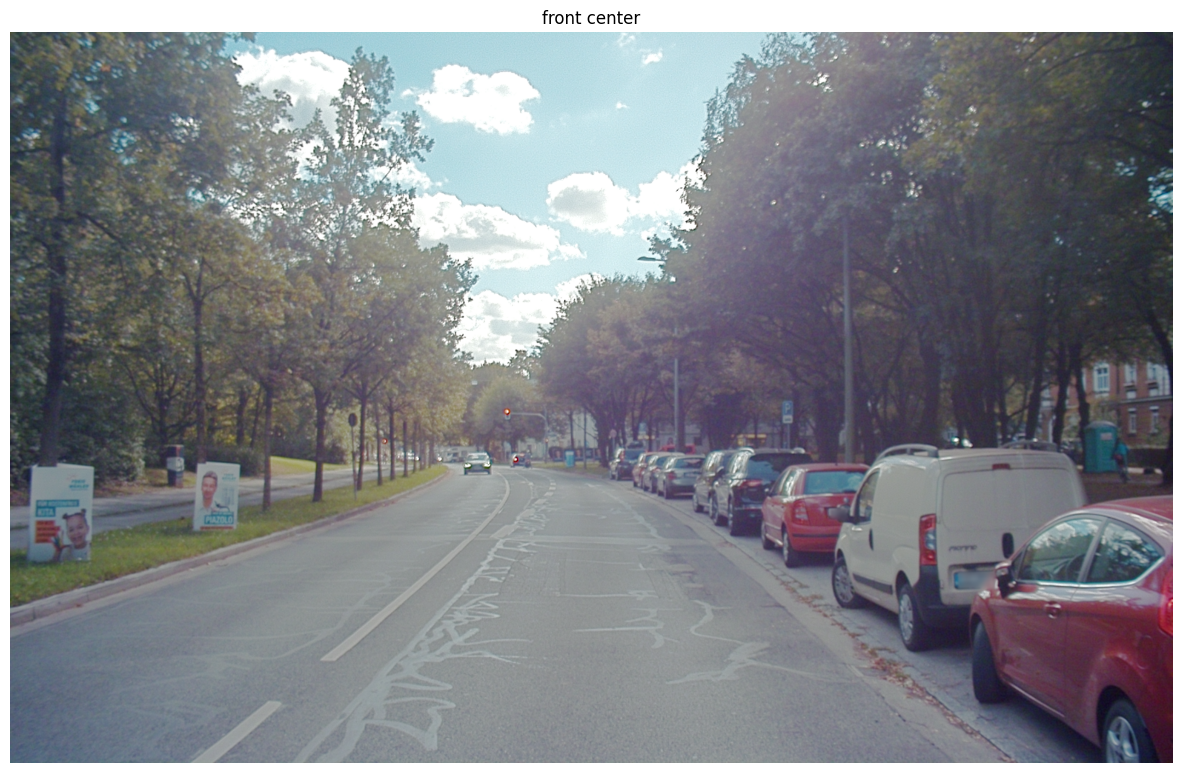

In [21]:
# -----Display the image------
image_front_center = cv2.cvtColor(image_front_center, cv2.COLOR_BGR2RGB)
pt.fig = pt.figure(figsize=(15, 15))

# display image from front center camera
pt.imshow(image_front_center)
pt.axis('off')
pt.title('front center')

In [22]:
file_name_image_info = file_name_image.replace(".png", ".json")

def read_image_info(file_name):
    with open(file_name, 'r') as f:
        image_info = json.load(f)
        
    return image_info

image_info_front_center = read_image_info(file_name_image_info)  
# Display the information for the front center camera

pprint.pprint(image_info_front_center)

{'cam_name': 'front_center',
 'cam_tstamp': 1537876333900931,
 'lidar_ids': {'0': 'front_left',
               '1': 'rear_right',
               '2': 'front_right',
               '3': 'front_center',
               '4': 'rear_left'}}


In [23]:
def skew_sym_matrix(u):
    return np.array([[    0, -u[2],  u[1]], 
                     [ u[2],     0, -u[0]], 
                     [-u[1],  u[0],    0]])

def axis_angle_to_rotation_mat(axis, angle):
    return np.cos(angle) * np.eye(3) + \
        np.sin(angle) * skew_sym_matrix(axis) + \
        (1 - np.cos(angle)) * np.outer(axis, axis)

Read the bounding boxes corresponding to the frame. We can read the bounding boxes as follows

In [24]:
import json
def read_bounding_boxes(file_name_bboxes):
    # open the file
    with open (file_name_bboxes, 'r') as f:
        bboxes = json.load(f)
        
    boxes = [] # a list for containing bounding boxes  
    print(bboxes.keys())
    
    for bbox in bboxes.keys():
        bbox_read = {} # a dictionary for a given bounding box
        bbox_read['class'] = bboxes[bbox]['class']
        bbox_read['truncation']= bboxes[bbox]['truncation']
        bbox_read['occlusion']= bboxes[bbox]['occlusion']
        bbox_read['alpha']= bboxes[bbox]['alpha']
        bbox_read['top'] = bboxes[bbox]['2d_bbox'][0]
        bbox_read['left'] = bboxes[bbox]['2d_bbox'][1]
        bbox_read['bottom'] = bboxes[bbox]['2d_bbox'][2]
        bbox_read['right']= bboxes[bbox]['2d_bbox'][3]
        bbox_read['center'] =  np.array(bboxes[bbox]['center'])
        bbox_read['size'] =  np.array(bboxes[bbox]['size'])
        angle = bboxes[bbox]['rot_angle']
        axis = np.array(bboxes[bbox]['axis'])
        bbox_read['rotation'] = axis_angle_to_rotation_mat(axis, angle) 
        boxes.append(bbox_read)

    return boxes 

In [25]:
def extract_bboxes_file_name_from_image_file_name(file_name_image):
    file_name_bboxes = file_name_image.split('/')
    file_name_bboxes = file_name_bboxes[-1].split('.')[0]
    file_name_bboxes = file_name_bboxes.split('_')
    file_name_bboxes = file_name_bboxes[0] + '_' + \
                  'label3D_' + \
                  file_name_bboxes[2] + '_' + \
                  file_name_bboxes[3] + '.json'
    
    return file_name_bboxes

seq_name = file_name_lidar.split('/')[2]
file_name_bboxes = extract_bboxes_file_name_from_image_file_name(file_name_image)
file_name_bboxes = join(root_path, seq_name, 'label3D/cam_front_center/', file_name_bboxes)
print (file_name_bboxes)
boxes = read_bounding_boxes(file_name_bboxes)

./camera_lidar_semantic_bboxes/20180925_135056/label3D/cam_front_center/20180925135056_label3D_frontcenter_000003556.json
dict_keys(['box_0', 'box_1', 'box_2'])


In [27]:
file_name_lidar

'./camera_lidar_semantic_bboxes/20180925_135056/lidar/cam_front_center/20180925135056_lidar_frontcenter_000003556.npz'

In [26]:
pprint.pprint(boxes)

[{'alpha': 0.0,
  'bottom': 1411.882,
  'center': array([17.13065, -3.3704 , -1.06485]),
  'class': 'Car',
  'left': 712.8365,
  'occlusion': 1.0,
  'right': 896.8972,
  'rotation': array([[ 9.99564440e-01,  2.95115171e-02,  1.03800706e-08],
       [-2.95115171e-02,  9.99564440e-01, -1.06910588e-08],
       [-1.06910588e-08,  1.03800706e-08,  1.00000000e+00]]),
  'size': array([3.53, 1.48, 1.53]),
  'top': 1204.545,
  'truncation': 0.0},
 {'alpha': 0.0,
  'bottom': 1773.064,
  'center': array([10.7088 , -3.38945, -0.8694 ]),
  'class': 'Car',
  'left': 667.6932,
  'occlusion': 1.0,
  'right': 1045.329,
  'rotation': array([[ 0.99985267, -0.01716511,  0.        ],
       [ 0.01716511,  0.99985267,  0.        ],
       [ 0.        ,  0.        ,  1.        ]]),
  'size': array([3.37, 1.82, 1.91]),
  'top': 1299.654,
  'truncation': 0.0},
 {'alpha': 0.0,
  'bottom': 2520.479,
  'center': array([ 6.27   , -3.33225, -0.95805]),
  'class': 'Car',
  'left': 705.9764,
  'occlusion': 1.0,
  'ri